# PC Test Environ Maker

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt

from tangle import Tangle, node_graph, watcher
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Experiment 1

This is a test experiment, I didn't need to actually make a conflicting transaction here as we aren't monitoring the orphan status of the original transaction. We are instead measuring the number of tip confirmations.

This experiment will test the number of tip confirmations of a system built with a parasite chain and a system with the same number of transactions without the parastie chain.

### PC Tangle

In [2]:
t = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng = node_graph(t)
w = watcher(t, ng)
for n in range(4):
    ng.new_node()

ng.new_node(mal=True, watch=w)

for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

ng.nodes[-1].issue_bad_transaction()
PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
w.update()
ng.nodes[-1].spam_transactions(10)
badNode = ng.nodes[-1]
print(badNode.chain)

for j in range(2):
    for i in range(4):
        ng.nodes[i].issue_transaction()
        w.update()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F53019BDD0>]
Edges []
Node IDS [0]
Weights [[0, 821, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F53019BDD0>, <tangle.node object at 0x000001F52FBE0770>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 821, 1], [1, 1250, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F53019BDD0>, <tangle.node object at 0x000001F52FBE0770>, <tangle.node object at 0x000001F52FCE8830>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 821, 1], [1, 1250, 1], [2, 542, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F53019BDD0>, <tangle.node object at 0x000001F52FBE0770>, <tangle.node object at 0x000001F52FCE8830>, <tangle.node object at 0x000001F52FBC22D0>]
Edges [(1, 0), (2, 1), (2, 0), (3, 0), (3, 2)]
Node IDS [0, 1, 2, 3]
Weights [[0, 821, 1], [1, 1250, 1], [2, 542, 1], [3, 1116, 1]]
Finished up

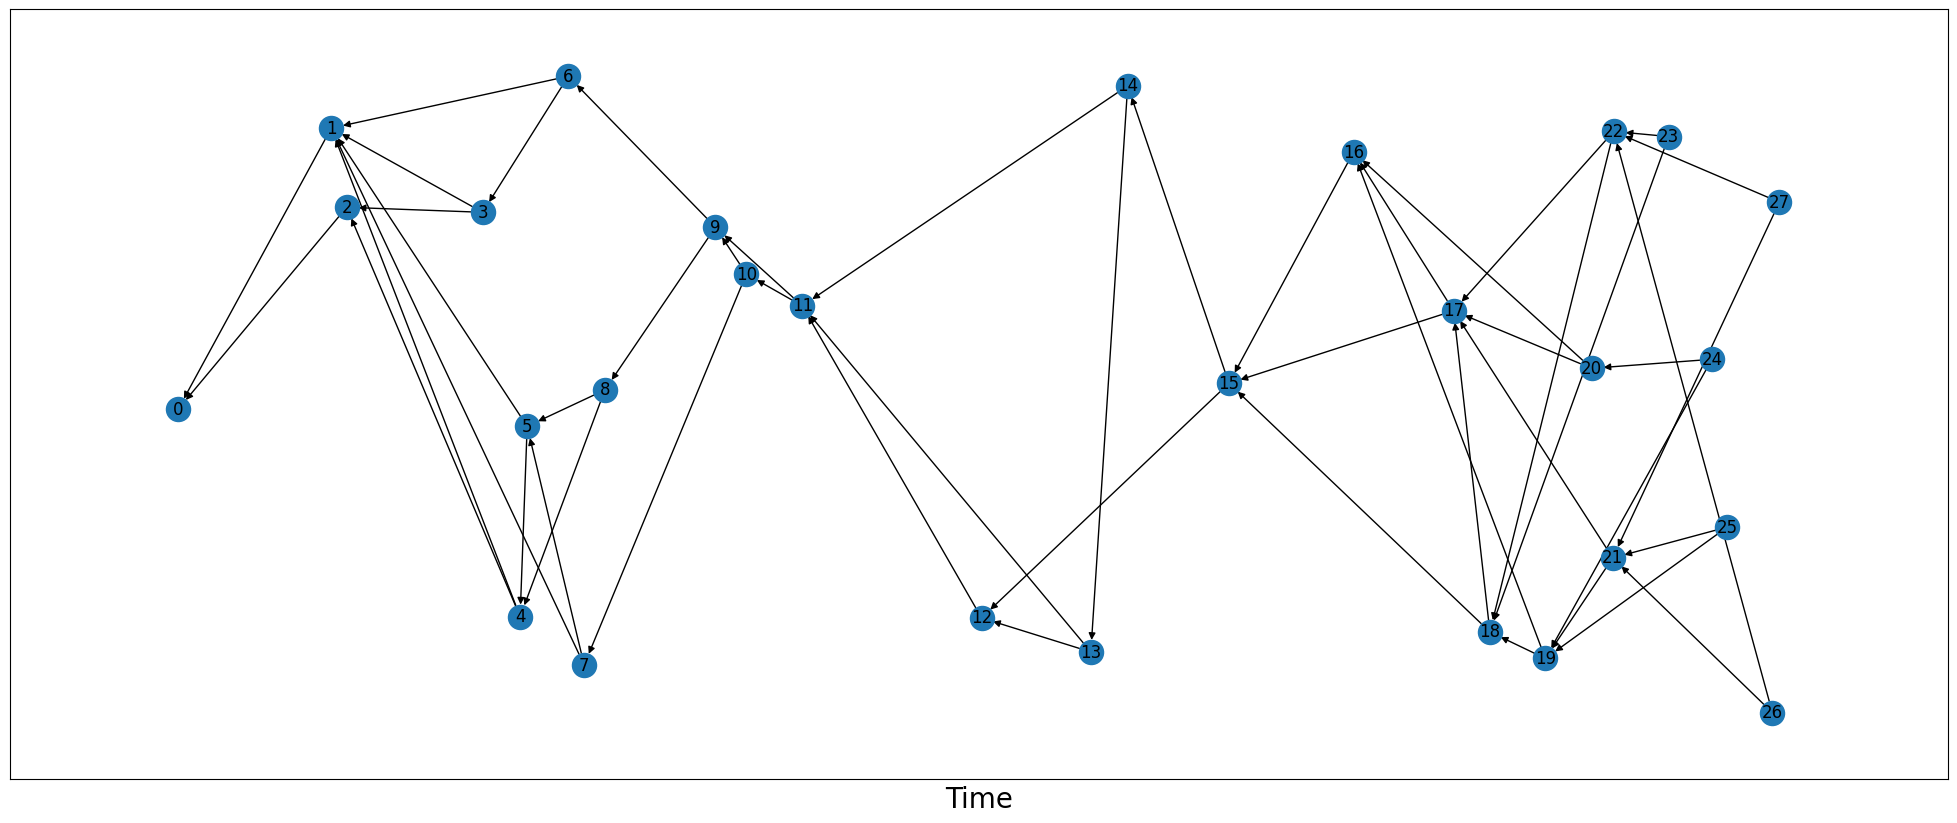

In [3]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3, 4, 4, 4, 9, 9, 11, 11, 11, 12, 15, 16, 16, 18, 18] [1.0, 1.04715950885151, 1.1523956249630631, 2.0827781815457156, 2.338969499846294, 2.387082205311514, 2.668292842202395, 2.7767698435468793, 2.9188036907653347, 3.6748022426350264, 3.8860304741779523, 4.268578249165667, 5.494537151613095, 6.242132994951727, 6.494128400042136, 7.186654477306579, 8.03855229428355, 8.7228515341351, 8.971272520713555, 9.350878628110467, 9.666444202778527, 9.81136051854646, 9.818019077813364, 10.193886640041786, 10.489576267890989, 10.593864206831427, 10.90309556074808, 10.951077436942876]
3.6748022426350264
3.6748022426350264
[1.0, 1.05, 1.15, 2.08, 2.34, 2.39, 2.67, 2.78, 2.92, 3.67, 3.89, 4.27, 5.49, 6.24, 6.49, 7.19, 8.04, 8.72, 8.97, 9.35, 9.67, 9.81, 9.82, 10.19, 10.49, 10.59, 10.9, 10.95]
    confirmations   time
0               1   1.00
1               1   1.05
2               1   1.15
3               1   2.08
4               1   2.34
5               1   2.

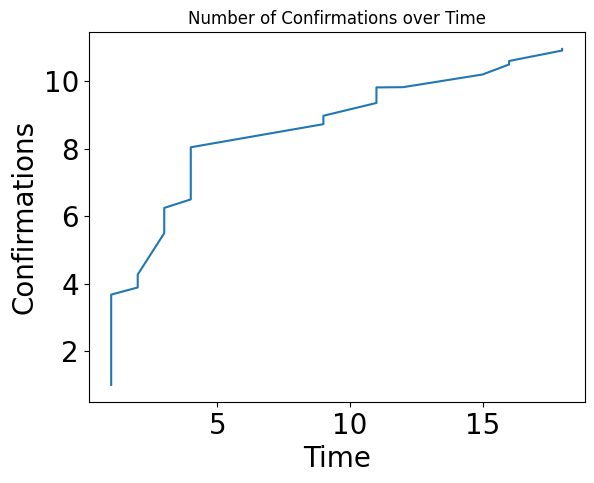

In [4]:
w.plot_confirm_over_time()
print(PC_issue_time)
w.output_to_sheet(1)

### Non-PC Tangle

In [5]:
t2 = Tangle(rate=3, tip_selection='mcmc', plot=True)
ng2 = node_graph(t2)
w2 = watcher(t2, ng2)

for n in range(4):
    ng2.new_node()


for j in range(9):
    for i in range(4):
        ng2.nodes[i].issue_transaction()
        w2.update()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F5307204A0>]
Edges []
Node IDS [0]
Weights [[0, 1935, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F5307204A0>, <tangle.node object at 0x000001F530720D10>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 1935, 1], [1, 1856, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F5307204A0>, <tangle.node object at 0x000001F530720D10>, <tangle.node object at 0x000001F530720AD0>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 1935, 1], [1, 1856, 1], [2, 1325, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001F5307204A0>, <tangle.node object at 0x000001F530720D10>, <tangle.node object at 0x000001F530720AD0>, <tangle.node object at 0x000001F530721B50>]
Edges [(1, 0), (2, 1), (2, 0), (3, 2), (3, 0)]
Node IDS [0, 1, 2, 3]
Weights [[0, 1935, 1], [1, 1856, 1], [2, 1325, 1], [3, 218, 1]]
Tips 0

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 5, 5, 5, 6, 6, 6, 7, 8, 9, 10, 10, 10, 10, 10, 11, 11, 12, 17] [1.0, 1.0163956316983096, 1.0562002327474351, 1.115887118030861, 2.0728237944764016, 2.1071819952733657, 2.2005155821800364, 2.301683790478356, 2.466067982378334, 2.507360389425929, 2.779250391448694, 3.054812179722242, 3.606627862463901, 3.7747126985127046, 3.9446881023018188, 3.9462481135070306, 4.008336483839078, 4.231858071541958, 4.313384226306103, 4.523536877508714, 4.765344862822781, 5.432764357326274, 5.484268001167744, 6.302076090433318, 6.744330613775352, 7.0661390857635515, 7.223017633584379, 7.333097993940318, 7.3482247054197956, 7.403486945645603, 7.4918835619060715, 7.5392322865291765, 7.635385726208448, 8.147587989768136, 8.3044025156807, 8.36166570778436, 8.664385772692356]


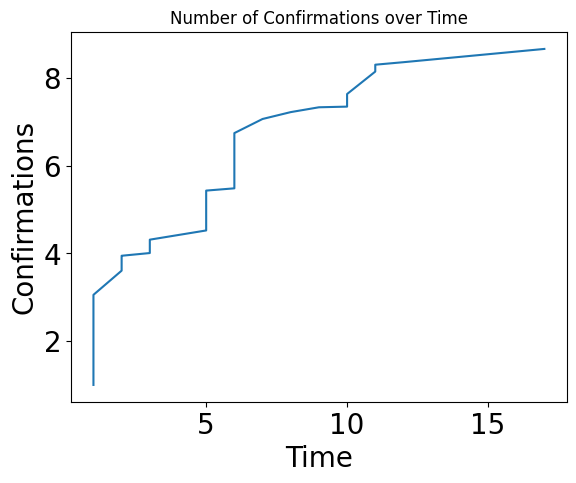

In [6]:
w2.plot_confirm_over_time()